## We are building a prediction model for Salary_hike

In [1]:
import pandas as pd

In [10]:
data = pd.read_csv("/content/Salary_Data.csv")

In [11]:
data.head()   # X Variable is YrsExp; Y variable is Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#Correlation

In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


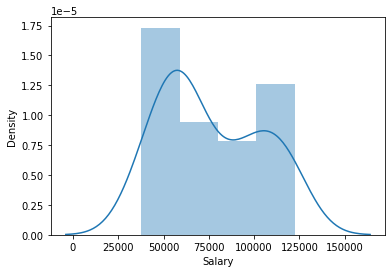

In [15]:
sns.distplot(data['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


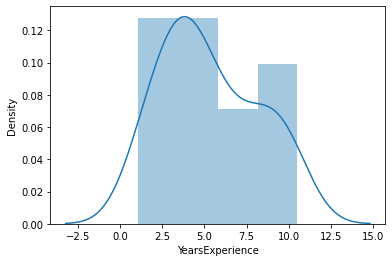

In [16]:
sns.distplot(data['YearsExperience'])

#Fitting a Linear Regression Model

In [17]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience', data=data).fit()

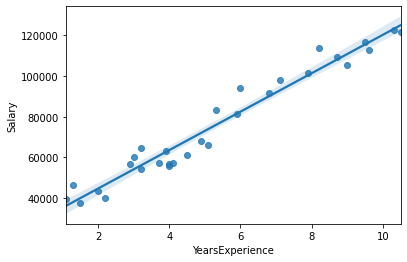

In [19]:
sns.regplot(x='YearsExperience', y='Salary', data=data);

In [20]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
#tvalue and p-Values
print(model.tvalues, '\n' , model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


#### p-Value of YearsExperience is less than alpha(0.05), it means there is a significant relation between both the variable

In [23]:
# R Square value
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

#### R Square value is 0.956 it is a very goodd equation

# Predict for new data point

In [29]:
# Predict the salary for 5 years Experience
newdata = pd.Series([5.1])

In [30]:
newdata

0    5.1
dtype: float64

In [31]:
data_pred = pd.DataFrame(newdata, columns=['YearsExperience'])

In [32]:
data_pred

,YearsExperience
0,5.1


In [33]:
model.predict(data_pred)

0    73987.008038
dtype: float64

#Result : Salary hike for 5.1 years Experience is 73042

With the help of this model we can predict the salary hike with respect to the Years of Experience.